![En tête general](img/En_tete_general.png)


*(C) Copyright Franck CHEVRIER 2019-2020 http://www.python-lycee.com/*

<span style="color: #9317B4"> Pour exécuter une saisie Python, sélectionner la cellule et valider avec </span><span style="color: #B317B4"><strong>SHIFT+Entrée</strong></span>.


# Approximation d’une intégrale par la méthode des rectangles

<span style="color: #7C39C9">*Certaines fonctions n’ont pas de primitives qui peuvent s’écrire à l’aide des fonctions usuelles.*</span> 

<span style="color: #7C39C9">*C’est par exemple le cas de la fonction f définie sur $\mathbb{R}$ par $f(x)=e^{-x^2}$.*</span> 

<span style="color: #7C39C9">*Le but de cette activité est d’obtenir malgré tout des valeurs approchées de l’intégrale
$K=\int_{0}^{1}{e^{-x²}dx}$*.</span> 


## I. Introduction de la méthode

__1. Placer les points $M_0$  ; $M_1$  ; $M_2$  ; $M_3$  et $M_4$  de la courbe de $f$ d’abscisses respectives $0$ ; $\frac{1}{4}$ ; $\frac{2}{4}$; $\frac{3}{4}$ et $\frac{4}{4}$.__

![Rectangles à compléter](img/Methode_rectangles_intro.png)


__2. A l’aide de ces points, inscrire $4$ rectangles sous la courbe de $f$, de largeur $\frac{1}{4}$ et de longueur maximale.__


__3. Ecrire une fonction Python <mark>f</mark> qui prend <mark>x</mark> en argument et renvoie l’image de $x$ par $f$.__

<span style="color: #888888">*Important : Ne pas utiliser la fonction exp. Utiliser les notations de puissances à partir de la constante e, obtenue avec from math import e.*</span> 


In [1]:
from math import e
# Ecrire la fonction

def f(x):
    return e**(-x**2)

In [2]:
# Tester la fonction
f(1)

0.36787944117144233

__Ecrire une fonction Python <mark>Aire_rect</mark> qui reçoit en argument la largeur <mark>l</mark> et la longueur <mark>L</mark> d’un rectangle et renvoie son aire.__


In [3]:
# Ecrire la fonction
def Aire_rect(l,L):
    return l*L

In [4]:
# Tester la fonction
Aire_rect(3,5)

15

__A l’aide de ces fonctions, calculer la somme des aires des $4$ rectangles précédents, et en déduire un minorant de $K$.__

In [5]:
# Effectuer les saisies nécessaires
Aire_rect(1/4,f(1/4))+Aire_rect(1/4,f(2/4))+Aire_rect(1/4,f(3/4))+Aire_rect(1/4,f(4/4))

0.6639690279468116

## II. Automatisation de la construction et du calcul 

__1. La fonction ci-dessous trace la courbe représentative de $f$ sur l’intervalle $[0;1]$ et construit les 4 rectangles sous la courbe de $f$. 
Tester cette fonction.__

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import numpy as np

def Methode_rectangle(n=4):
    
    # tracé de la courbe de f
    prec=0.05
    abs_fonc = np.arange(0,1+prec,prec)
    ord_fonc = f(abs_fonc)
    plt.plot(abs_fonc,ord_fonc,color='green')
    
    ax = plt.gca()
    
    #initialisation du compteur
    Aire_inf=0
    
    # tracé des rectangles et calcul de l'aire
    l=1/n
    for k in range(n):
        x=k*1/n
        L=f(x+1/n)
        #Rectangle défini par le point en bas à gauche,
        #sa largeur l et sa longueur L
        rect=ptc.Rectangle( (x,0) , l, L, fill=False)
        ax.add_patch(rect)  
        
        #incrément du compteur
        Aire_inf = Aire_inf + Aire_rect(l,L)

    # affichage de l'aire sous la figure
    plt.text(0,-0.1,'Aire='+str(Aire_inf)) 
    # reglage des bornes des axes du repere
    plt.axis([0,1,0,1]) 
    # affichage    
    plt.show() 

    # (Ces fonctionnalités sont désactivées dans la version Notebook)
    # attente d'une action de clic sur la fenetre puis fermeture
    # plt.waitforbuttonpress() 
    # plt.close()

    return Aire_inf


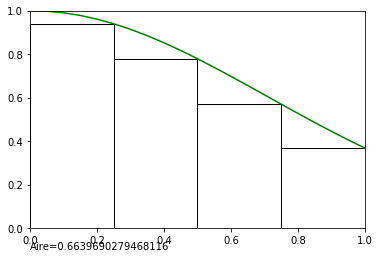

0.6639690279468116

In [7]:
#Test de la fonction
Methode_rectangle()

__2. Prévoir les valeurs successives prises par les variables <mark>x</mark>, <mark>l</mark> et <mark>L</mark> dans la boucle en complétant ce tableau :__


|   $k$      |   0 |   1  |   2  |   3  |
| :-------:  |:--: | :--: | :--: | :--: |
|   $x$      |     |      |      |      |
|   $l$      |     |      |      |      |
|   $L$      |     |      |      |      |


__Compléter la fonction précédente pour qu’elle renvoie <mark>Aire_inf</mark> qui est la somme des aires de ces rectangles.__


<span style="color: #888888">*Aides :*</span>
<span style="color: #888888">*On pourra ajouter un compteur qui s’incrémente à chaque étape de la boucle, en utilisant la fonction* Aire_rect *précédemment écrite.*</span> 
<span style="color: #888888">*On pourra éventuellement utiliser l’instruction* plt.text(0,-0.1,’Aire=’+str(Aire_inf)) *pour afficher cette aire sur le graphique.*</span>  

__Tester et vérifier qu’on retrouve le résultat de la question I.3.__

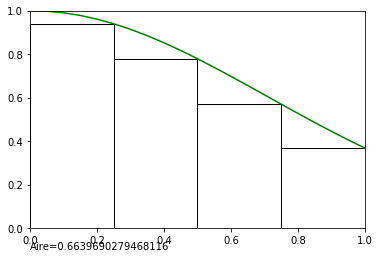

0.6639690279468116

In [8]:
# Tester la fonction modifiée
Methode_rectangle()

__3. Modifier la fonction pour qu’elle reçoive en argument le nombre <mark>n</mark> de rectangles souhaités, et adapter l’affichage et le calcul. Tester pour $n=10$ puis pour $n=100$.__


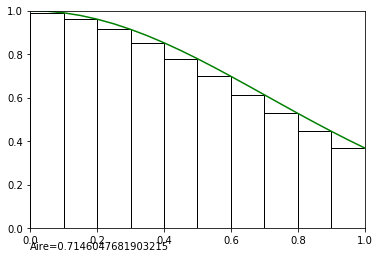

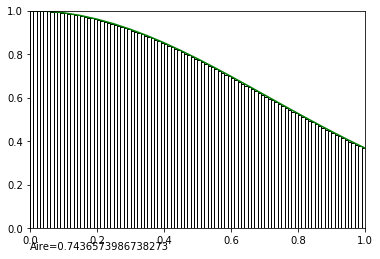

(0.7146047681903215, 0.7436573986738273)

In [9]:
#Effectuer les tests
Methode_rectangle(10) , Methode_rectangle(100) 

## III. Recherche de la précision de la méthode

__1. A l'aide de la figure dynamique ci-dessous, vérifier les résultats des questions I.3 et II.3.__

<span style="color: #FF0000">*(Pour faire apparaître et activer la figure dynamique, sélectionner la cellule et valider avec <strong>SHIFT+Entrée</strong>).*</span>


In [10]:
#Sélectionner cette zone puis SHIFT+ENTREE
from IPython.display import display, HTML ; display(HTML('fig_dyn_GeoGebra/Rectangles.html'))

__2. On se place dans le cas général où on trace $n$ rectangles de même largeur sous la courbe de $f$ sur l’intervalle $[0;1]$, et on note $s_n$ la somme de leurs aires (voir la figure dynamique fournie).__

__Justifier que
$ s_n=\frac{1}{n} \left ( f(\frac{1}{n})+f(\frac{2}{n})+f(\frac{3}{n})+⋯+f(\frac{n}{n}) \right ) =\frac{1}{n} \sum_{k=0}^{n-1} \ f \left ( \frac{k+1}{n} \right ) \ $__



__3. On considère de la même façon la somme $S_n$ des aires de $n$ rectangles de même largeur construits au-dessus de la courbe de $f$ sur l’intervalle $[0;1]$ (utiliser le curseur vert sur la figure dynamique fournie)__

__Donner une expression de $S_n$ similaire à celle de $s_n$.__


__4. Exprimer $S_n-s_n$ en fonction de $n$.__

__En admettant que $s_n \leqslant \int_{0}^{1} \ e^{-x²} dx \  \leqslant S_n $, en déduire que :
$ 0 \leqslant ∫_0^1 \ e^{-x^2} dx \ -s_n \leqslant 1/n $ .__

__Quelle valeur de $n$ faut-il choisir pour que $s_n$ soit une valeur approchée de $K$ à $10^{-4}$ près ?__

__Donner une valeur approchée à $10^{-4}$ près de cette intégrale $K$ à l’aide de vos fonctions Python de la partie II.__




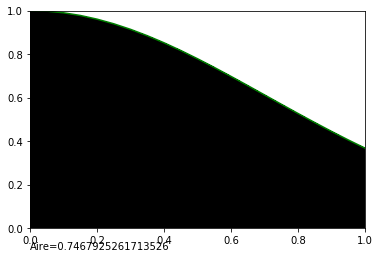

0.7467925261713526

In [11]:
# Effectuer les saisies nécessaires
Methode_rectangle(10000)

Georg Friedrich Bernhardt Riemann (1826-1866) est à l’origine de cette méthode d’approximation d’intégrales à l’aide de rectangles

![Riemann](img/Methode_rectangles_Riemann.png)

*(C) Copyright Franck CHEVRIER 2019-2020 http://www.python-lycee.com/*
